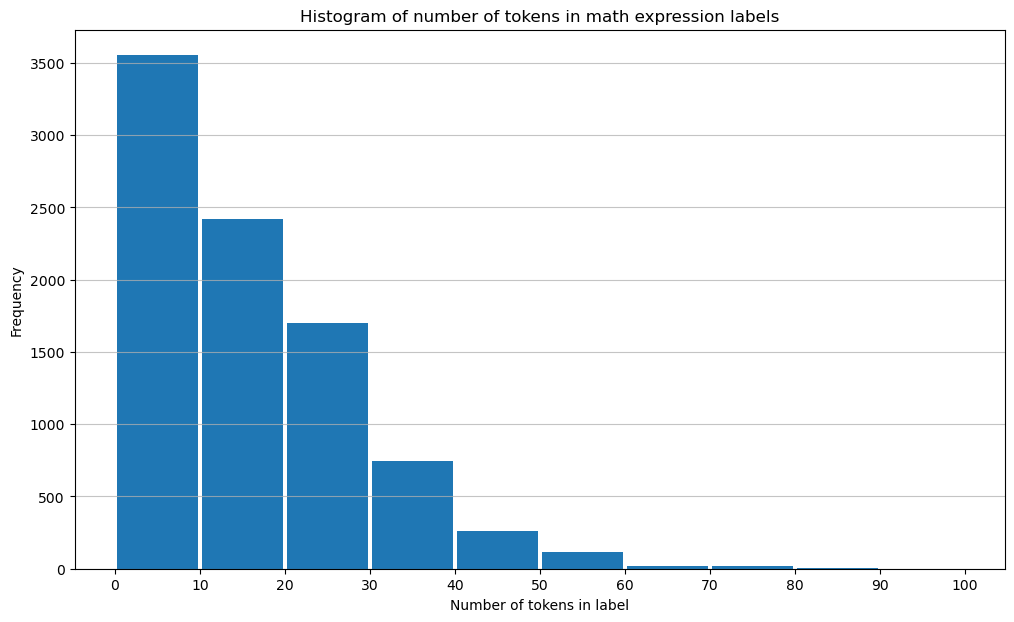

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

def analyze(folder_paths):
    all_data = []
    for folder_path in folder_paths:
        for root, _, files in os.walk(folder_path):
            for file in files:
                if file.endswith('.txt'):
                    file_path = os.path.join(root, file)
                    try:
                        df = pd.read_csv(file_path, sep='\t', header=None, names=['filename', 'label'])
                        all_data.append(df)
                    except Exception as e:
                        print(f'Error reading file {file_path}: {e}')

    merged_df = pd.concat(all_data, ignore_index=True)
    merged_df['token_count'] = merged_df['label'].str.split().str.len()


    max_tokens = merged_df['token_count'].max()
    bins = np.arange(0, max_tokens + 10, 10)

    plt.figure(figsize=(12, 7))
    plt.hist(merged_df['token_count'], bins=bins, rwidth=0.95)
    plt.xlabel('Number of tokens in label')
    plt.ylabel('Frequency')
    plt.title('Histogram of number of tokens in math expression labels')
    plt.xticks(bins)
    plt.grid(axis='y', alpha=0.75)
    plt.show()

    return merged_df

folder_path = ['../resources/CROHME/train']
combined_dataframe = analyze(folder_path)

In [2]:
combined_dataframe

,filename,label,token_count
0,200924-1331-216,1,1
1,200923-131-185,1,1
2,200923-1553-117,1,1
3,200923-1251-17,l,1
4,200923-1556-256,l,1
...,...,...,...
8829,formulaire021-equation072,x = a _ { 0 } + \frac { 1 } { a _ { 1 } + \fra...,45
8830,formulaire013-equation046,\frac { \sin x } { x } = \frac { \sin x - \sin...,22
8831,formulaire018-equation059,\alpha ^ { n } + a _ { n - 1 } \alpha ^ { n - ...,37
8832,formulaire026-equation008,\frac { n _ { 1 } } { a _ { 1 } } - \frac { n ...,49


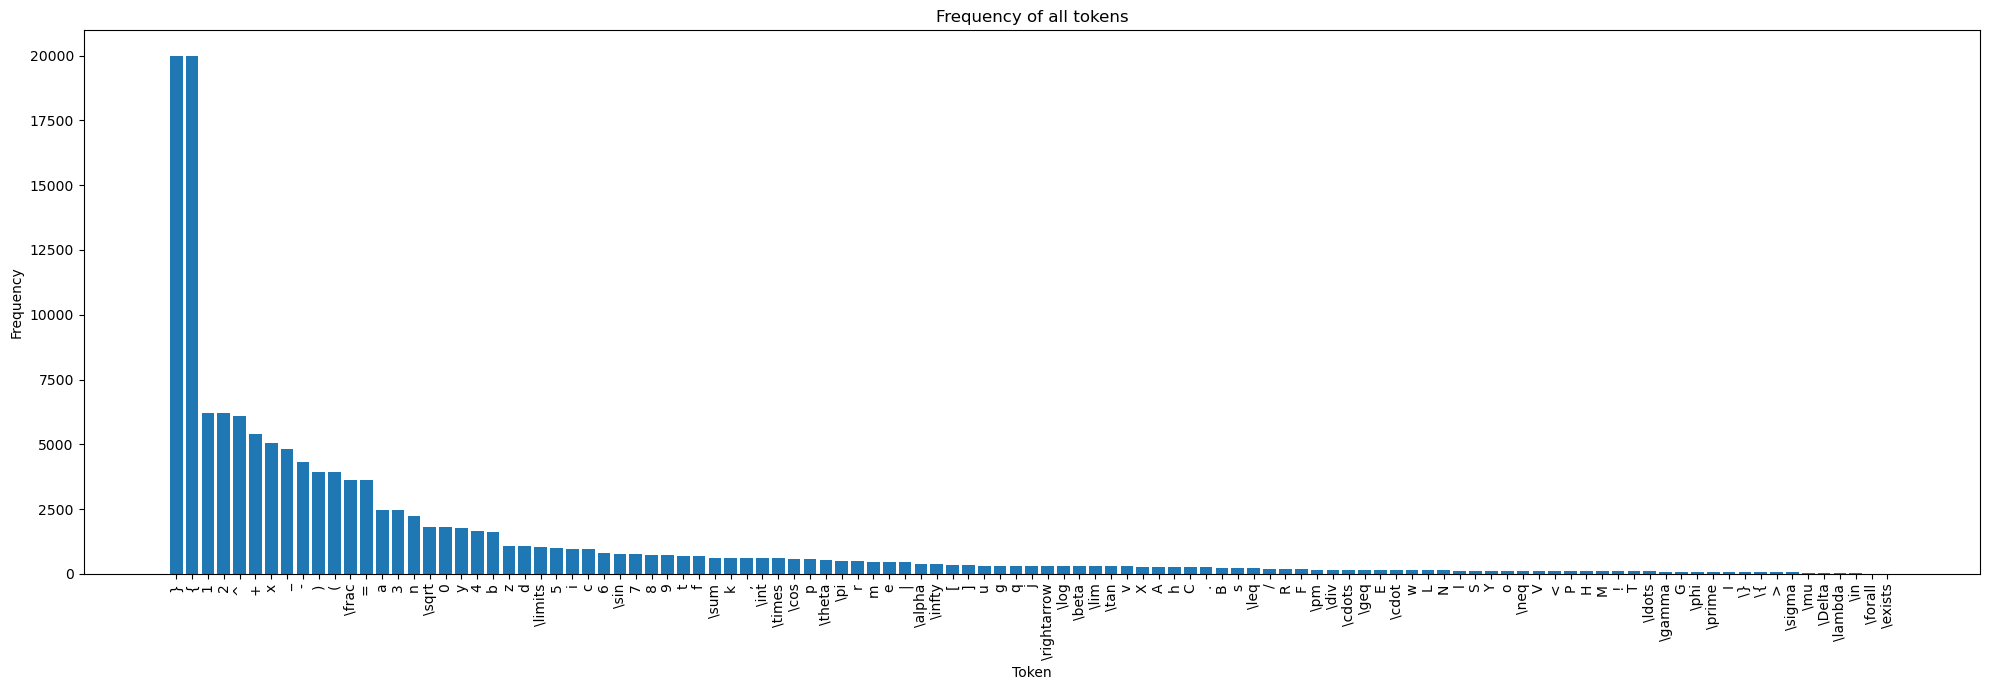

,token,frequency
0,},19976
1,{,19976
2,1,6207
3,2,6190
4,^,6099
...,...,...
104,\Delta,35
105,\lambda,27
106,\in,14
107,\forall,8


In [3]:
def analyze_token_frequencies(combined_df, top_n=150):

    all_labels_text = ' '.join(combined_df['label'].astype(str).tolist())
    tokens = all_labels_text.split()
    token_counts = Counter(tokens)

    token_frequency_df = pd.DataFrame(token_counts.items(), columns=['token', 'frequency'])
    token_frequency_df = token_frequency_df.sort_values(by='frequency', ascending=False).reset_index(drop=True)

    top_n_tokens_df = token_frequency_df.head(top_n)
    tokens_to_plot = top_n_tokens_df['token'].tolist()
    counts_to_plot = top_n_tokens_df['frequency'].tolist()

    plt.figure(figsize=(20, 7))
    plt.bar(tokens_to_plot, counts_to_plot)
    plt.xlabel("Token")
    plt.ylabel("Frequency")
    if top_n >= len(token_counts):
        plt.title(f"Frequency of all tokens")
    else:
        plt.title(f"Frequency of top {top_n} tokens")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

    return token_frequency_df

tokens_df = analyze_token_frequencies(combined_dataframe)
tokens_df

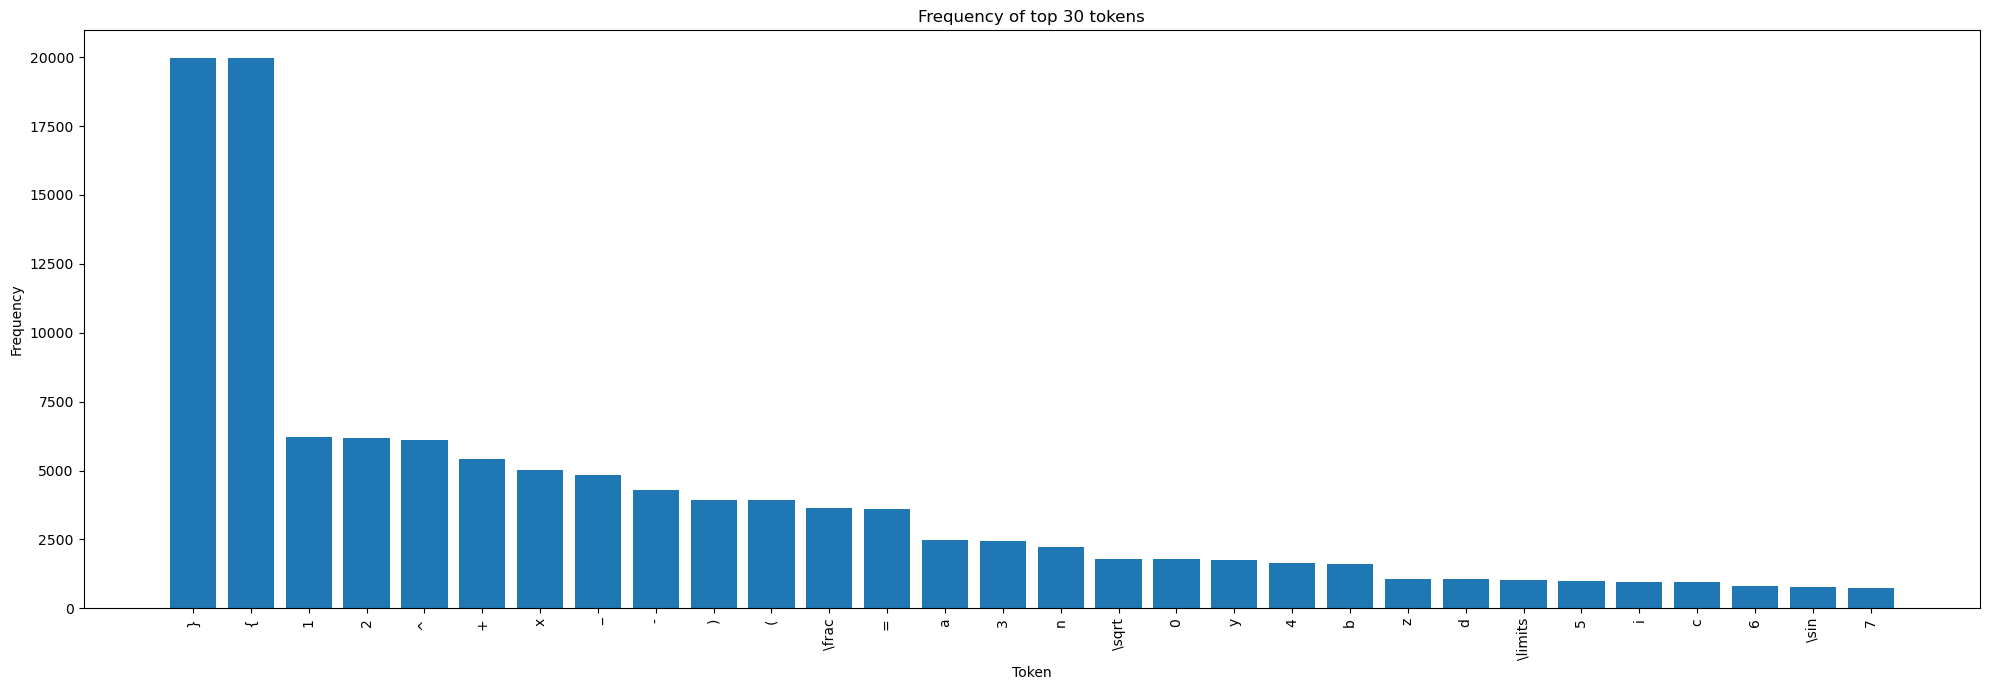

In [4]:
_ = analyze_token_frequencies(combined_dataframe, top_n=30)